## Advance Properties <br>
1. Aspect Ratio <br>
2. Extent <br>
3. Convex hull <br>
4. Solidity <br>

**Aspect Ratio**: ratio of image width / image height <br>
Usage: distinguish between squares and rectangles, detect handwritten digits in images; <br>

aspect ratio < 1 : height > width; image appear to more tall. <br>
aspect ration > 1: width > height; for example, license plate <br>
aspect ration = 1; same in height and width;  for examples, squares and circles. <br>

**Extent** of a shape or contour is the ratio of the contour area to the bounding area; <br>
extent = shape area / bounding area <br>

 

**A Convex hull** is alomost like a mathematical rubber band.

**Solidity** of a shape is the area of the contour area divided by the area of the conver hull. <br>
solidity = contour area / convex hull area <br>



In [23]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

O (Contour #1) -- solidity=0.98
X (Contour #2) -- solidity=0.60
O (Contour #3) -- solidity=0.98
X (Contour #4) -- solidity=0.60
X (Contour #5) -- solidity=0.60
O (Contour #6) -- solidity=0.98
? (Contour #7) -- solidity=0.28


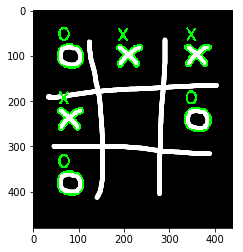

In [24]:
# tic-tac-toe

# load the tic-tac-toe image and convert it to grayscale
image = cv2.imread("./data/tictactoe.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find all contours on the tic-tac-toe board
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for (i, c) in enumerate(cnts):
    # compute the area of the contour along with the bounding box
    # to compute the aspect ratio
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    

    # compute the convex hull of the contour, then use the area of the
    # original contour and the area of the convex hull to compute the
    # solidity
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)
    
    #intialize the character text
    char ='?'
    
    #if the solidity is high, then we are examining 'O'
    if solidity > 0.9:
        char = 'O'
    #else examining 'X
    elif solidity > 0.5:
        char = 'X'
    #if the character is not known, draw it;
    if char != '?':
        cv2.drawContours( image, [c], -1, (0,255,0), 3 )
        cv2.putText( image, char, (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (0,255,0), 4 )
        
    print("{} (Contour #{}) -- solidity={:.2f}".format(char, i + 1, solidity))

plt.imshow(image)